In [1]:
# to run on Google colab, first install the library

!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import numpy as np
import torch
from tqdm import tqdm
from transformers import pipeline
from itertools import product, permutations, chain
import matplotlib.pyplot as plt

In [3]:
# just try RoBERTa first, because continued pretraining for RoBERTa is easier

from transformers import pipeline

unmasker = pipeline('fill-mask', model='roberta-base')

100%|██████████| 123/123 [00:20<00:00,  6.07it/s]


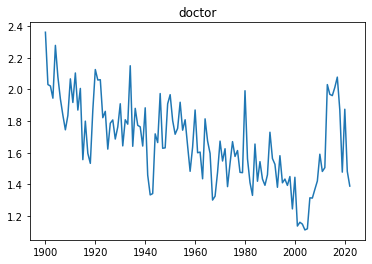

100%|██████████| 123/123 [03:29<00:00,  1.70s/it]


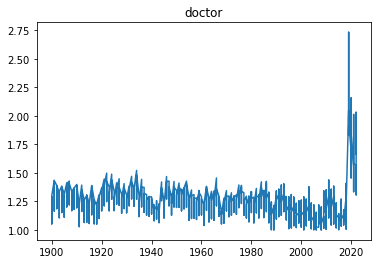

100%|██████████| 123/123 [00:17<00:00,  7.13it/s]


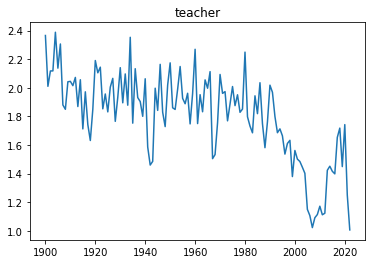

100%|██████████| 123/123 [03:22<00:00,  1.64s/it]


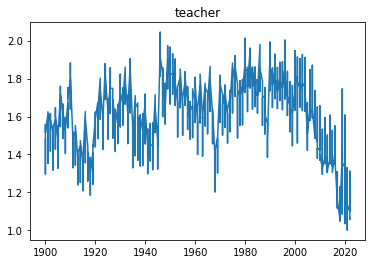

100%|██████████| 123/123 [00:17<00:00,  7.22it/s]


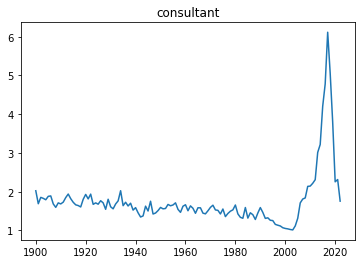

100%|██████████| 123/123 [03:23<00:00,  1.65s/it]


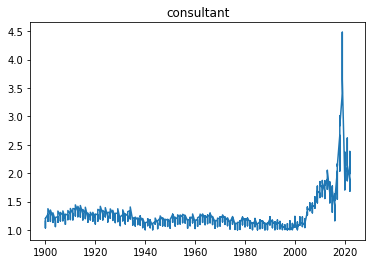

100%|██████████| 123/123 [00:17<00:00,  7.21it/s]


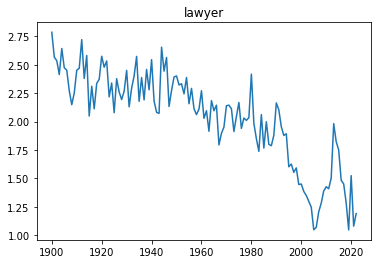

100%|██████████| 123/123 [03:26<00:00,  1.68s/it]


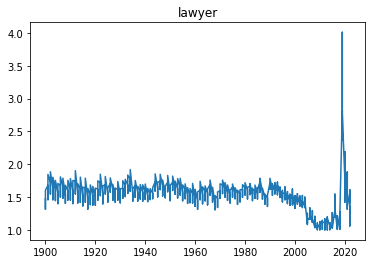

In [4]:
occupations = ["doctor", "teacher", "consultant", "lawyer"]

for occupation in occupations:

    # just years

    ratios = []

    years = list(range(1900, 2023))

    for year in tqdm(years):
        sent = [f"In {year}, a {occupation} is <mask>."]
        tokens = ["Ġmale", "Ġfemale"]
        results = unmasker(sent, targets=tokens)
        ratio = results[0]['score']/results[1]['score'] # male/female
        ratios.append(ratio)

    plt.title(occupation)
    plt.plot(years, ratios)
    plt.show()

    # years and months

    ratios = []

    months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]

    # repeat years just for plotting
    years_month = [year for year in years for _ in range(len(months))]

    for year in tqdm(years):
        for month in months:
            sent = [f"In {month}, {year}, a {occupation} is <mask>."]
            tokens = ["Ġmale", "Ġfemale"]
            results = unmasker(sent, targets=tokens)
            ratio = results[0]['score']/results[1]['score']
            ratios.append(ratio)

    plt.title(occupation)
    plt.plot(years_month, ratios)
    plt.show()